# Evaluate BartPy on sample regression data

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

from matplotlib import pyplot as plt
%matplotlib inline

from bartpy.sklearnmodel import SklearnModel

In [3]:
regression = make_regression(n_samples=2000, n_features=20, n_informative=10)
X, y = regression

In [19]:
def get_clean_model():
    return SklearnModel(n_chains=4, 
                        n_jobs=4, 
                        n_burn=200,
                        n_samples=1000, 
                        n_trees=200, 
                        initializer=None)

In [20]:
model = get_clean_model()
model.fit(X, y)

SklearnModel(alpha=0.95, beta=2.0, initializer=None, n_burn=200, n_chains=4,
             n_jobs=4, n_samples=1000, n_trees=200, sigma_a=0.001,
             sigma_b=0.001, store_acceptance_trace=False,
             store_in_sample_predictions=False, thin=0.1,
             tree_sampler=<bartpy.samplers.unconstrainedtree.treemutation.UnconstrainedTreeMutationSampler object at 0x7fabc0db6390>)

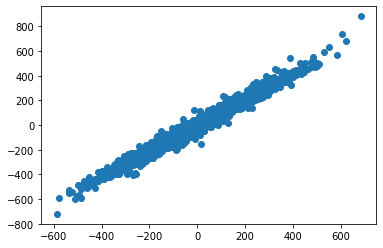

In [21]:
plt.scatter(model.predict(X), y)

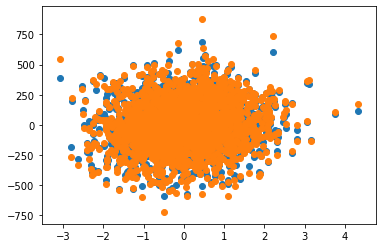

In [22]:
plt.scatter(X[:, 0], model.predict(X))
plt.scatter(X[:, 0], y)

In [23]:
from sklearn.model_selection import KFold
from datetime import datetime
from catboost import CatBoostRegressor, Pool
kf = KFold(n_splits=2, shuffle=True)
b_scores, c_scores = [], []
for train_index, test_index in kf.split(X):
    print(datetime.now())
    model = get_clean_model()
    model.fit(X[train_index], y[train_index])
    b_scores.append(np.sum(np.square(y[test_index] - model.predict(X[test_index]))))
    print(datetime.now())
    # eval_pool = Pool(X[train_index][:300,:], y[train_index][:300])
    # train_pool = Pool(X[train_index][300:,:], y[train_index][300:])
    # c_model = CatBoostRegressor()
    # c_model.fit(train_pool, eval_set=eval_pool, verbose=300)
    # c_scores.append(np.sum(np.square(y[test_index] - c_model.predict(X[test_index]))))
    # print(datetime.now())

2020-02-06 07:40:20.812192
2020-02-06 07:42:16.719351
2020-02-06 07:42:16.719699
2020-02-06 07:44:12.908608


In [24]:
print(b_scores)
print(c_scores)

[1511377.4338000447, 1198964.9607221275]
[]


In [12]:
np.sqrt(b_scores[0]) / X.shape[0], np.sqrt(c_scores[0]) / X.shape[0]

IndexError: list index out of range

In [25]:
np.sqrt(b_scores[0] / X[test_index].shape[0])

38.87643802870891

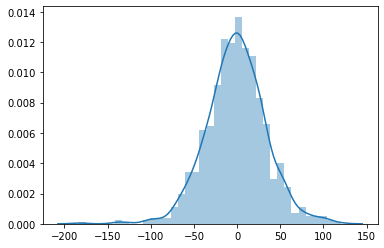

In [26]:
import seaborn as sns
sns.distplot(model.residuals(X[test_index], y[test_index]))

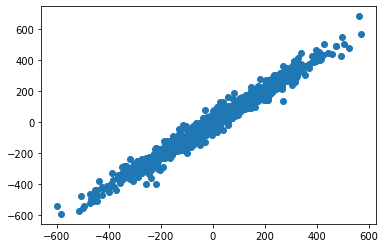

In [28]:
plt.scatter(model.predict(X[test_index]), y[test_index])
#plt.scatter(c_model.predict(X[test_index]), y[test_index])

0.9755208151788579

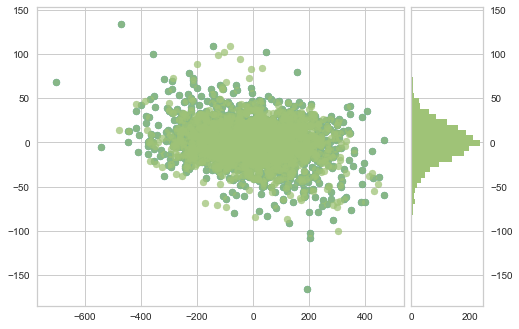

In [11]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = get_clean_model()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X, y)

0.9700097741424252

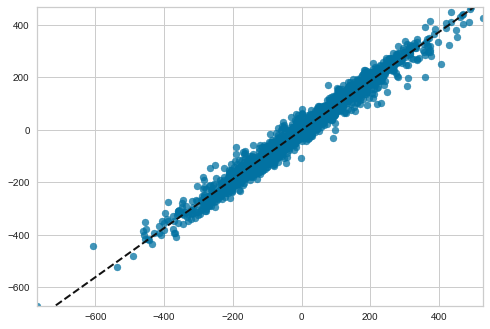

In [12]:
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = get_clean_model()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X, y)